In [4]:
import pandas as pd

# Load daily-level data with stockout and sales info
daily_df = pd.read_parquet("/Users/jhilmitasri/Repositories/MyRepositories/freshretail-demand-forecasting/data/daily_dataset/freshretail_daily.parquet")
print("✅ Daily dataset loaded:", daily_df.shape)

✅ Daily dataset loaded: (4500000, 19)


In [7]:
import pandas as pd

# Assume daily_df is already loaded and has columns ['third_category_id', 'daily_sale', ...]
# 1. Compute total sales per category
category_sales = (
    daily_df
    .groupby('third_category_id')['daily_sale']
    .sum()
    .sort_values(ascending=False)
)

# 2. Select top 10
top_10_categories = category_sales.head(10).index.tolist()
print("Top 10 third_category_ids by total sales:", top_10_categories)

Top 10 third_category_ids by total sales: [81, 184, 60, 82, 1, 24, 149, 154, 113, 123]


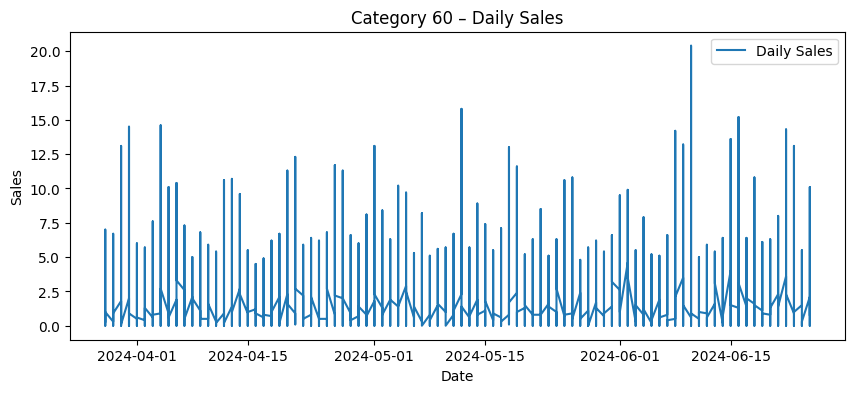

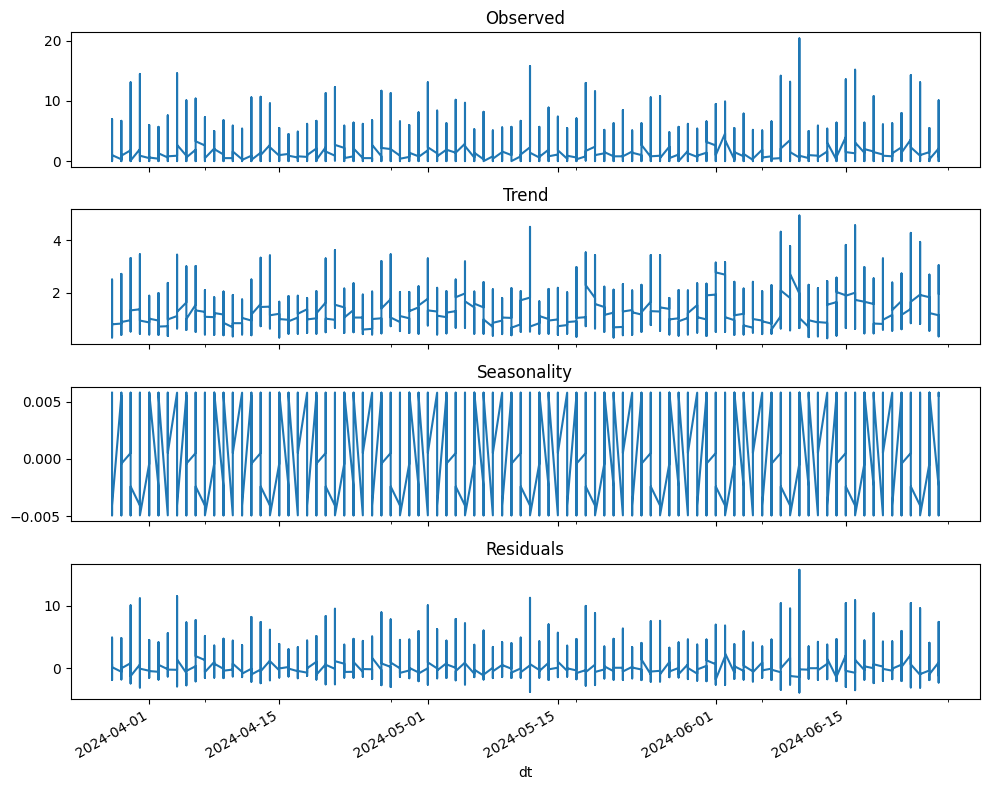

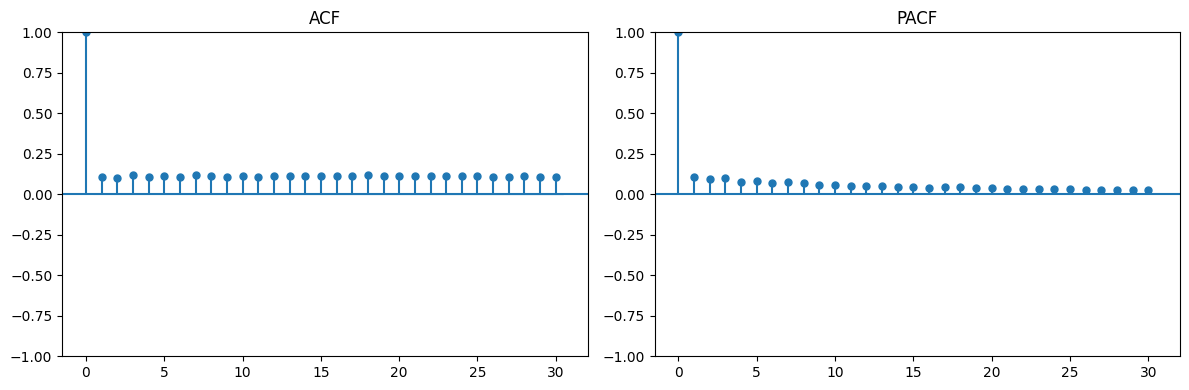

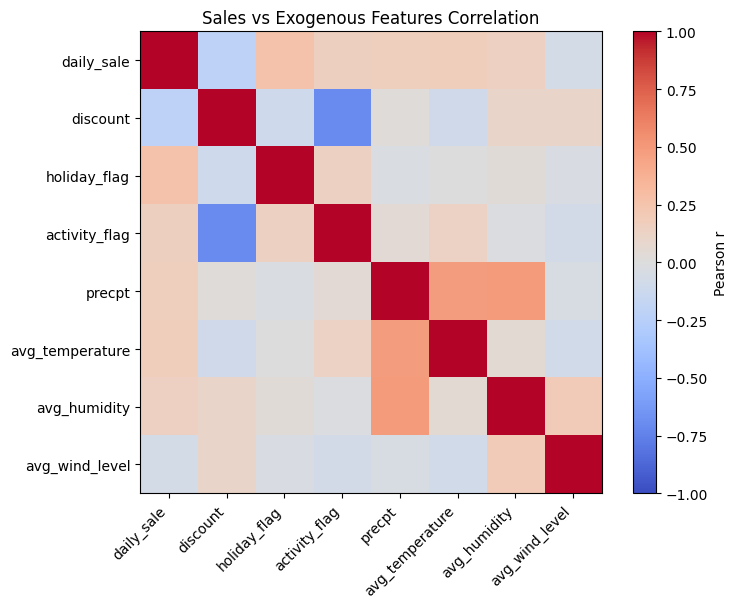

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the daily dataset
# daily_df = pd.read_parquet("data/daily_dataset/freshretail_daily.parquet")

# Pick a category for EDA
category_id = 60
df_cat = (
    daily_df
    .loc[daily_df["third_category_id"] == category_id]
    .sort_values("dt")
    .set_index("dt")
)

y = df_cat["daily_sale"]
exog_vars = ["discount", "holiday_flag", "activity_flag",
             "precpt", "avg_temperature", "avg_humidity", "avg_wind_level"]
exog = df_cat[exog_vars]

# 1️⃣ Time Series Plot
plt.figure(figsize=(10,4))
plt.plot(y, label="Daily Sales")
plt.title(f"Category {category_id} – Daily Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# 2️⃣ Weekly Seasonal Decomposition
decomp = seasonal_decompose(y, model="additive", period=7)
fig, axes = plt.subplots(4,1, figsize=(10,8), sharex=True)
decomp.observed.plot(ax=axes[0], title="Observed")
decomp.trend.plot(ax=axes[1], title="Trend")
decomp.seasonal.plot(ax=axes[2], title="Seasonality")
decomp.resid.plot(ax=axes[3], title="Residuals")
plt.tight_layout()
plt.show()

# 3️⃣ ACF & PACF (lags up to 30 days)
fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_acf(y.fillna(0), lags=30, ax=axes[0]); axes[0].set_title("ACF")
plot_pacf(y.fillna(0), lags=30, ax=axes[1]); axes[1].set_title("PACF")
plt.tight_layout()
plt.show()

# 4️⃣ Correlation Matrix
corr = df_cat[["daily_sale"]+exog_vars].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, vmin=-1, vmax=1, cmap="coolwarm")
plt.xticks(range(len(corr)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr)), corr.index)
plt.colorbar(label="Pearson r")
plt.title("Sales vs Exogenous Features Correlation")
plt.show()